In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [466]:
match_df = pd.read_csv(r"D:\downloadD\Football_predict\premier_league_multi_season.csv")

In [467]:
match_df.shape

(3800, 28)

In [468]:
match_df.isnull().sum()

Date                0
Time                0
Comp                0
Round               0
Day                 0
Venue               0
Result            620
GF                620
GA                620
Opponent            0
xG                620
xGA               620
Poss              620
Attendance        622
Captain           620
Formation         620
Opp Formation     620
Referee           620
Match Report        0
Notes            3800
Sh                620
SoT               620
Dist              620
FK                620
PK                620
PKatt             620
Season              0
Team                0
dtype: int64

In [469]:
match_df['Team'].value_counts()

Team
Arsenal                     190
Liverpool                   190
Tottenham Hotspur           190
Manchester City             190
Crystal Palace              190
Chelsea                     190
Everton                     190
Newcastle United            190
Manchester United           190
Aston Villa                 190
Brighton and Hove Albion    190
Wolverhampton Wanderers     190
Brentford                   190
West Ham United             190
Bournemouth                 152
Fulham                      152
Nottingham Forest           152
Burnley                     114
Leeds United                114
Southampton                 114
Leicester City              114
Sunderland                   38
Ipswich Town                 38
Luton Town                   38
Sheffield United             38
Watford                      38
Norwich City                 38
Name: count, dtype: int64

In [470]:
match_df['Round'].value_counts()

Round
Matchweek 1     100
Matchweek 2     100
Matchweek 3     100
Matchweek 4     100
Matchweek 5     100
Matchweek 6     100
Matchweek 7     100
Matchweek 8     100
Matchweek 9     100
Matchweek 10    100
Matchweek 11    100
Matchweek 12    100
Matchweek 13    100
Matchweek 14    100
Matchweek 15    100
Matchweek 16    100
Matchweek 17    100
Matchweek 18    100
Matchweek 19    100
Matchweek 20    100
Matchweek 21    100
Matchweek 22    100
Matchweek 23    100
Matchweek 24    100
Matchweek 25    100
Matchweek 26    100
Matchweek 27    100
Matchweek 28    100
Matchweek 29    100
Matchweek 30    100
Matchweek 31    100
Matchweek 32    100
Matchweek 33    100
Matchweek 34    100
Matchweek 35    100
Matchweek 36    100
Matchweek 37    100
Matchweek 38    100
Name: count, dtype: int64

In [471]:
match_df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,8/17/2025,16:30 (22:30),Premier League,Matchweek 1,Sun,Away,W,1.0,0.0,Manchester Utd,...,Match Report,NaN,9.0,3.0,18.6,1.0,0.0,0.0,2025,Arsenal
1,8/23/2025,17:30 (23:30),Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Leeds United,...,Match Report,NaN,17.0,4.0,15.2,0.0,1.0,1.0,2025,Arsenal
2,8/31/2025,16:30 (22:30),Premier League,Matchweek 3,Sun,Away,L,0.0,1.0,Liverpool,...,Match Report,NaN,11.0,1.0,17.5,1.0,0.0,0.0,2025,Arsenal
3,9/13/2025,12:30 (18:30),Premier League,Matchweek 4,Sat,Home,W,3.0,0.0,Nott'ham Forest,...,Match Report,NaN,16.0,5.0,13.5,0.0,0.0,0.0,2025,Arsenal
4,9/21/2025,16:30 (22:30),Premier League,Matchweek 5,Sun,Home,D,1.0,1.0,Manchester City,...,Match Report,NaN,12.0,3.0,14.1,0.0,0.0,0.0,2025,Arsenal


In [472]:
match_df.dtypes

Date              object
Time              object
Comp              object
Round             object
Day               object
Venue             object
Result            object
GF               float64
GA               float64
Opponent          object
xG               float64
xGA              float64
Poss             float64
Attendance       float64
Captain           object
Formation         object
Opp Formation     object
Referee           object
Match Report      object
Notes            float64
Sh               float64
SoT              float64
Dist             float64
FK               float64
PK               float64
PKatt            float64
Season             int64
Team              object
dtype: object

In [473]:
match_df['Time'] = match_df['Time'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]

In [474]:
print(match_df['Time'].value_counts())

Time
15:00    1524
14:00     484
20:00     464
17:30     284
16:30     260
12:30     232
19:30     174
19:45     130
16:00      86
20:15      66
13:30      22
14:15      16
19:00      14
12:00      12
13:00       8
14:05       6
15:30       6
18:00       4
17:15       2
14:30       2
15:45       2
16:15       2
Name: count, dtype: int64


In [475]:
match_df['venue_code'] = match_df['Venue'].astype('category').cat.codes

In [476]:
match_df['opp_code'] = match_df['Opponent'].astype('category').cat.codes

In [477]:
match_df['hours'] = match_df['Time'].str.replace(":.+", "", regex=True).astype("int")

In [478]:
match_df['day_code'] = match_df['Day'].astype('category').cat.codes

In [479]:
match_df['target'] = match_df['Result'].apply(lambda x: 1 if x == 'W' else 0)

In [480]:
match_df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,venue_code,opp_code,hours,day_code,target
0,8/17/2025,16:30,Premier League,Matchweek 1,Sun,Away,W,1.0,0.0,Manchester Utd,...,1.0,0.0,0.0,2025,Arsenal,0,16,16,3,1
1,8/23/2025,17:30,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Leeds United,...,0.0,1.0,1.0,2025,Arsenal,1,11,17,2,1
2,8/31/2025,16:30,Premier League,Matchweek 3,Sun,Away,L,0.0,1.0,Liverpool,...,1.0,0.0,0.0,2025,Arsenal,0,13,16,3,0
3,9/13/2025,12:30,Premier League,Matchweek 4,Sat,Home,W,3.0,0.0,Nott'ham Forest,...,0.0,0.0,0.0,2025,Arsenal,1,19,12,2,1
4,9/21/2025,16:30,Premier League,Matchweek 5,Sun,Home,D,1.0,1.0,Manchester City,...,0.0,0.0,0.0,2025,Arsenal,1,15,16,3,0


In [481]:

# Fix the leakage - use only PAST results
match_df = match_df.sort_values('Date')
match_df['recent_form'] = match_df.groupby('Team')['target'].transform(
    lambda x: x.shift(1).rolling(5, min_periods=1).mean()
)

# Fix h2h_wins leakage too
match_df['h2h_wins'] = match_df.groupby(['Team', 'Opponent'])['target'].transform(
    lambda x: x.shift(1).rolling(3, min_periods=1).sum()
)

In [482]:
grouped_matches = match_df.groupby('Team')

In [483]:
group = grouped_matches.get_group('Manchester City')

In [484]:
def rolling_averages(group, cols, new_cols):
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [485]:
# Use the correct column names as they appear in the dataframe
cols = ["GF", "GA", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]
new_cols = [f"{c.lower()}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,recent_form,h2h_wins,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
856,1/14/2025,19:30,Premier League,Matchweek 21,Tue,Away,D,2.0,2.0,Brentford,...,0.666667,NaN,2.000000,1.666667,15.333333,4.333333,19.066667,0.666667,0.333333,0.333333
3061,1/15/2022,12:30,Premier League,Matchweek 22,Sat,Home,W,1.0,0.0,Chelsea,...,0.500000,NaN,2.000000,2.000000,17.666667,6.666667,17.866667,0.666667,0.000000,0.000000
173,1/17/2026,15:00,Premier League,Matchweek 22,Sat,Away,NaN,NaN,NaN,Manchester Utd,...,0.600000,0.0,1.333333,1.333333,12.333333,5.000000,16.933333,0.333333,0.000000,0.000000
2299,1/22/2023,14:00,Premier League,Matchweek 21,Sun,Home,W,3.0,0.0,Wolves,...,0.600000,NaN,3.666667,1.000000,17.666667,6.666667,16.233333,0.333333,0.000000,0.000000
174,1/24/2026,15:00,Premier League,Matchweek 23,Sat,Home,NaN,NaN,NaN,Wolves,...,0.600000,1.0,3.333333,0.333333,16.333333,6.333333,15.733333,0.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,9/25/2021,12:30,Premier League,Matchweek 6,Sat,Away,W,1.0,0.0,Chelsea,...,0.400000,2.0,1.666667,1.000000,15.000000,6.000000,17.666667,1.000000,0.000000,0.000000
157,9/27/2025,15:00,Premier League,Matchweek 6,Sat,Home,W,5.0,1.0,Burnley,...,0.600000,2.0,1.666667,0.666667,18.333333,6.000000,18.166667,1.000000,0.000000,0.000000
841,9/28/2024,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,Newcastle Utd,...,0.600000,2.0,2.666667,0.333333,14.333333,5.000000,17.033333,0.666667,0.000000,0.000000
2285,9/3/2022,17:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,Aston Villa,...,0.600000,2.0,2.333333,0.666667,17.333333,5.666667,17.166667,0.000000,0.000000,0.000000


In [486]:
matches_rolling = match_df.groupby('Team').apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

Date   Time            Comp         Round  \
Team                                                                            
Arsenal                 818    1/15/2025  20:00  Premier League  Matchweek 21   
                        21     1/17/2026  15:00  Premier League  Matchweek 22   
                        3212   1/23/2022  14:00  Premier League  Matchweek 23   
                        22     1/24/2026  15:00  Premier League  Matchweek 23   
                        7     10/18/2025  17:30  Premier League   Matchweek 8   
...                                  ...    ...             ...           ...   
Wolverhampton Wanderers 727    9/27/2025  20:00  Premier League   Matchweek 6   
                        1335   9/28/2024  17:30  Premier League   Matchweek 6   
                        2741    9/3/2022  15:00  Premier League   Matchweek 6   
                        2017    9/3/2023  14:00  Premier League   Matchweek 4   
                        2020   9/30/2023  15:00  Premier League   Matchweek 7   

                              Day Venue Result   GF   GA         Opponent  \
Team                                                                        
Arsenal                 818   Wed  Home      W  2.0  1.0        Tottenham   
                        21    Sat  Away    NaN  NaN  NaN  Nott'ham Forest   
                        3212  Sun  Home      D  0.0  0.0          Burnley   
                        22    Sat  Home    NaN  NaN  NaN   Manchester Utd   
                        7     Sat  Away    NaN  NaN  NaN           Fulham   
...                           ...   ...    ...  ...  ...              ...   
Wolverhampton Wanderers 727   Sat  Away      D  1.0  1.0        Tottenham   
                        1335  Sat  Home      L  1.0  2.0        Liverpool   
                        2741  Sat  Home      W  1.0  0.0      Southampton   
                        2017  Sun  Away      L  2.0  3.0   Crystal Palace   
                        2020  Sat  Home      W  2.0  1.0  Manchester City   

                              ...  recent_form  h2h_wins  gf_rolling  \
Team                          ...                                      
Arsenal                 818   ...     0.666667       1.0    2.000000   
                        21    ...     0.750000       NaN    2.333333   
                        3212  ...     0.600000       NaN    3.333333   
                        22    ...     0.400000       1.0    2.666667   
                        7     ...     0.400000       NaN    2.000000   
...                           ...          ...       ...         ...   
Wolverhampton Wanderers 727   ...     0.200000       0.0    1.000000   
                        1335  ...     0.200000       0.0    1.000000   
                        2741  ...     0.200000       3.0    1.000000   
                        2017  ...     0.400000       1.0    1.000000   
                        2020  ...     0.400000       0.0    1.333333   

                              ga_rolling sh_rolling sot_rolling dist_rolling  \
Team                                                                           
Arsenal                 818     1.000000  11.666667    3.666667    16.066667   
                        21      0.666667  14.000000    4.333333    15.933333   
                        3212    1.333333  21.333333    6.000000    15.466667   
                        22      0.666667  22.000000    5.666667    16.566667   
                        7       1.000000  16.000000    6.333333    17.600000   
...                                  ...        ...         ...          ...   
Wolverhampton Wanderers 727     1.333333   6.000000    3.333333    11.800000   
                        1335    0.666667   5.666667    3.000000    11.866667   
                        2741    1.000000   7.333333    3.000000    17.166667   
                        2017    1.000000   8.000000    2.666667    16.966667   
                        2020    1.666667   9.000000    3.000000    17.333333   

  

In [487]:
matches_rolling = matches_rolling.droplevel('Team')
matches_rolling = matches_rolling.reset_index(drop=True)
matches_rolling

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,recent_form,h2h_wins,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,1/15/2025,20:00,Premier League,Matchweek 21,Wed,Home,W,2.0,1.0,Tottenham,...,0.666667,1.0,2.000000,1.000000,11.666667,3.666667,16.066667,0.666667,0.0,0.0
1,1/17/2026,15:00,Premier League,Matchweek 22,Sat,Away,NaN,NaN,NaN,Nott'ham Forest,...,0.750000,NaN,2.333333,0.666667,14.000000,4.333333,15.933333,0.666667,0.0,0.0
2,1/23/2022,14:00,Premier League,Matchweek 23,Sun,Home,D,0.0,0.0,Burnley,...,0.600000,NaN,3.333333,1.333333,21.333333,6.000000,15.466667,0.000000,0.0,0.0
3,1/24/2026,15:00,Premier League,Matchweek 23,Sat,Home,NaN,NaN,NaN,Manchester Utd,...,0.400000,1.0,2.666667,0.666667,22.000000,5.666667,16.566667,0.666667,0.0,0.0
4,10/18/2025,17:30,Premier League,Matchweek 8,Sat,Away,NaN,NaN,NaN,Fulham,...,0.400000,NaN,2.000000,1.000000,16.000000,6.333333,17.600000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,9/27/2025,20:00,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,Tottenham,...,0.200000,0.0,1.000000,1.333333,6.000000,3.333333,11.800000,0.000000,0.0,0.0
2043,9/28/2024,17:30,Premier League,Matchweek 6,Sat,Home,L,1.0,2.0,Liverpool,...,0.200000,0.0,1.000000,0.666667,5.666667,3.000000,11.866667,0.000000,0.0,0.0
2044,9/3/2022,15:00,Premier League,Matchweek 6,Sat,Home,W,1.0,0.0,Southampton,...,0.200000,3.0,1.000000,1.000000,7.333333,3.000000,17.166667,0.000000,0.0,0.0
2045,9/3/2023,14:00,Premier League,Matchweek 4,Sun,Away,L,2.0,3.0,Crystal Palace,...,0.400000,1.0,1.000000,1.000000,8.000000,2.666667,16.966667,0.000000,0.0,0.0


In [488]:
matches_rolling = matches_rolling.drop(['Venue','Notes','Match Report','Round','Day','Comp','Season'],axis=1)

In [489]:
matches_rolling = matches_rolling.dropna()

In [490]:
matches_rolling.isnull().sum()

Date             0
Time             0
Result           0
GF               0
GA               0
Opponent         0
xG               0
xGA              0
Poss             0
Attendance       0
Captain          0
Formation        0
Opp Formation    0
Referee          0
Sh               0
SoT              0
Dist             0
FK               0
PK               0
PKatt            0
Team             0
venue_code       0
opp_code         0
hours            0
day_code         0
target           0
recent_form      0
h2h_wins         0
gf_rolling       0
ga_rolling       0
sh_rolling       0
sot_rolling      0
dist_rolling     0
fk_rolling       0
pk_rolling       0
pkatt_rolling    0
dtype: int64

In [491]:
matches_rolling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 0 to 2046
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1447 non-null   object 
 1   Time           1447 non-null   object 
 2   Result         1447 non-null   object 
 3   GF             1447 non-null   float64
 4   GA             1447 non-null   float64
 5   Opponent       1447 non-null   object 
 6   xG             1447 non-null   float64
 7   xGA            1447 non-null   float64
 8   Poss           1447 non-null   float64
 9   Attendance     1447 non-null   float64
 10  Captain        1447 non-null   object 
 11  Formation      1447 non-null   object 
 12  Opp Formation  1447 non-null   object 
 13  Referee        1447 non-null   object 
 14  Sh             1447 non-null   float64
 15  SoT            1447 non-null   float64
 16  Dist           1447 non-null   float64
 17  FK             1447 non-null   float64
 18  PK           

In [492]:
matches_rolling.describe()

,GF,GA,xG,xGA,Poss,Attendance,Sh,SoT,Dist,FK,...,recent_form,h2h_wins,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,1.411887,1.494126,1.382308,1.448929,49.706980,40154.391154,12.628887,4.182446,16.936973,0.381479,...,0.353191,0.812025,1.441834,1.495508,12.686247,4.206404,16.983045,0.390002,0.104815,0.127160
std,1.291668,1.304768,0.829866,0.850814,12.210344,16555.243073,5.533984,2.441548,2.891617,0.600498,...,0.254796,0.847611,0.804441,0.822474,3.578254,1.492751,1.689573,0.354793,0.184277,0.205470
min,0.000000,0.000000,0.000000,0.000000,18.000000,10113.000000,1.000000,0.000000,6.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.333333,0.333333,11.800000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.700000,0.800000,41.000000,29535.500000,9.000000,2.000000,15.000000,0.000000,...,0.200000,0.000000,1.000000,1.000000,10.333333,3.000000,15.900000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.200000,1.300000,49.000000,36955.000000,12.000000,4.000000,16.800000,0.000000,...,0.400000,1.000000,1.333333,1.333333,12.333333,4.000000,16.966667,0.333333,0.000000,0.000000
75%,2.000000,2.000000,1.800000,1.900000,59.000000,53146.000000,16.000000,6.000000,18.800000,1.000000,...,0.600000,1.000000,2.000000,2.000000,14.666667,5.166667,18.066667,0.666667,0.333333,0.333333
max,9.000000,9.000000,4.400000,5.200000,82.000000,74257.000000,35.000000,16.000000,29.400000,3.000000,...,1.000000,3.000000,4.666667,4.666667,25.666667,10.000000,22.600000,2.000000,1.000000,1.000000


In [493]:
cat_cols=matches_rolling.select_dtypes(include=['object']).columns
num_cols = matches_rolling.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date', 'Time', 'Result', 'Opponent', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Team'],
      dtype='object')
Numerical Variables:
['GF', 'GA', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'venue_code', 'opp_code', 'hours', 'day_code', 'target', 'recent_form', 'h2h_wins', 'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling']


GF
Skew : 1.11


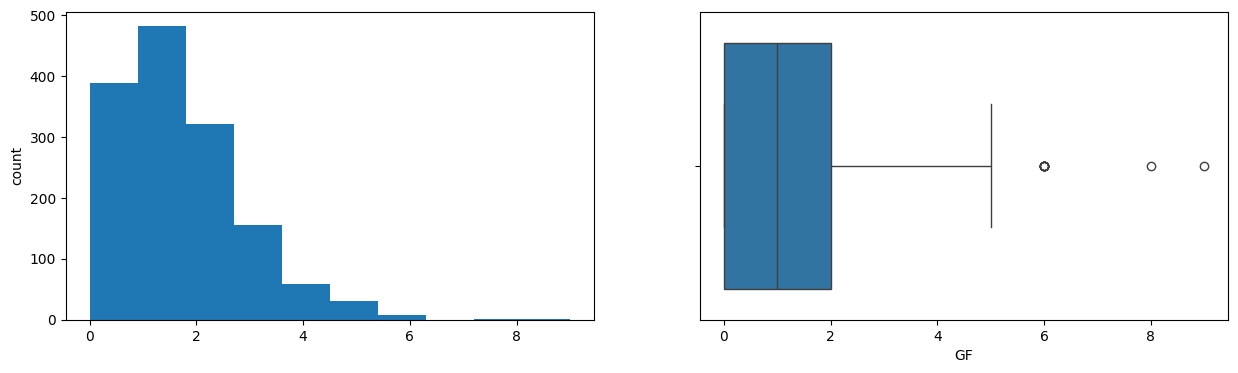

GA
Skew : 1.03


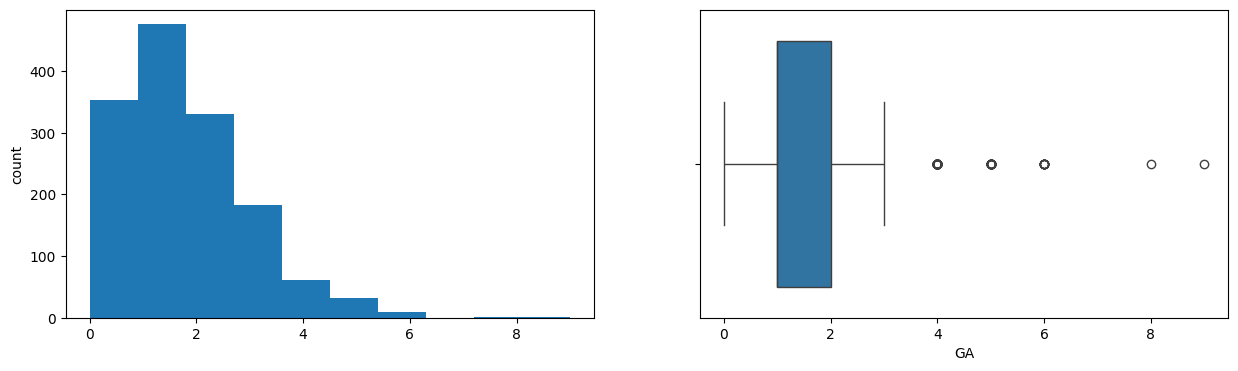

xG
Skew : 0.93


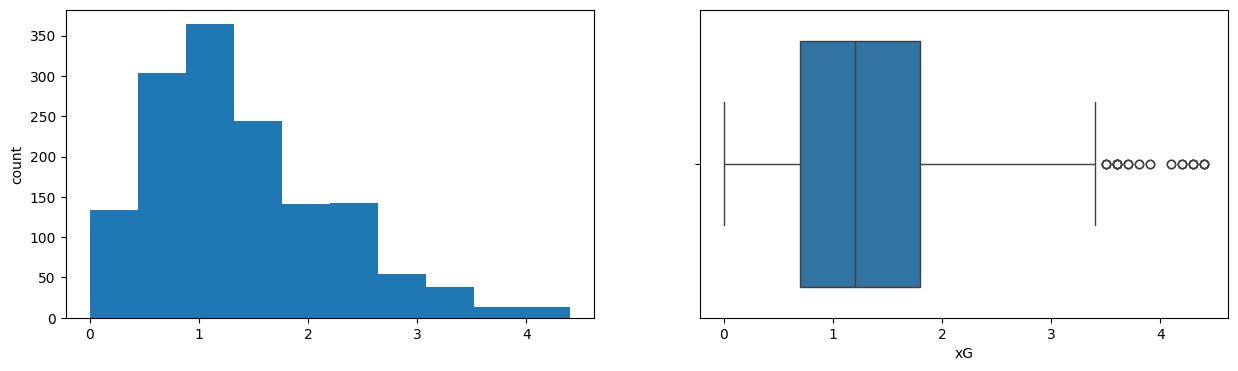

xGA
Skew : 0.9


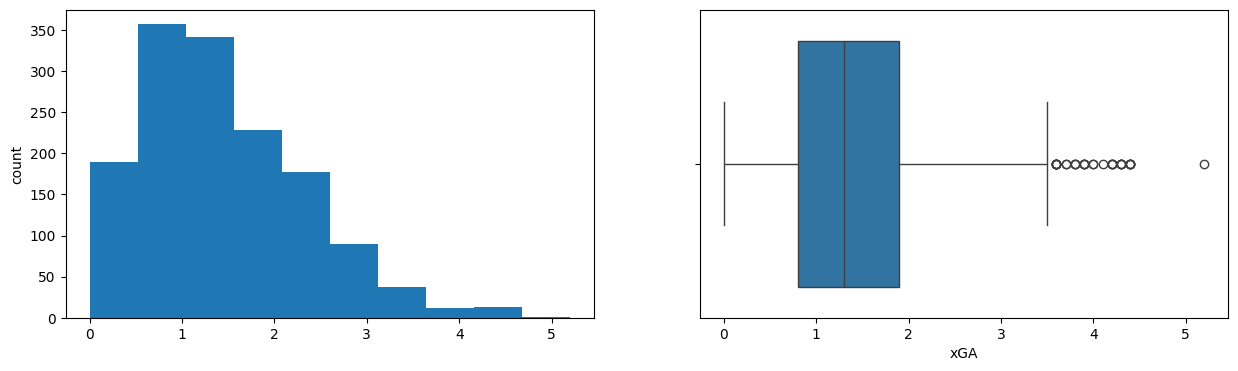

Poss
Skew : 0.01


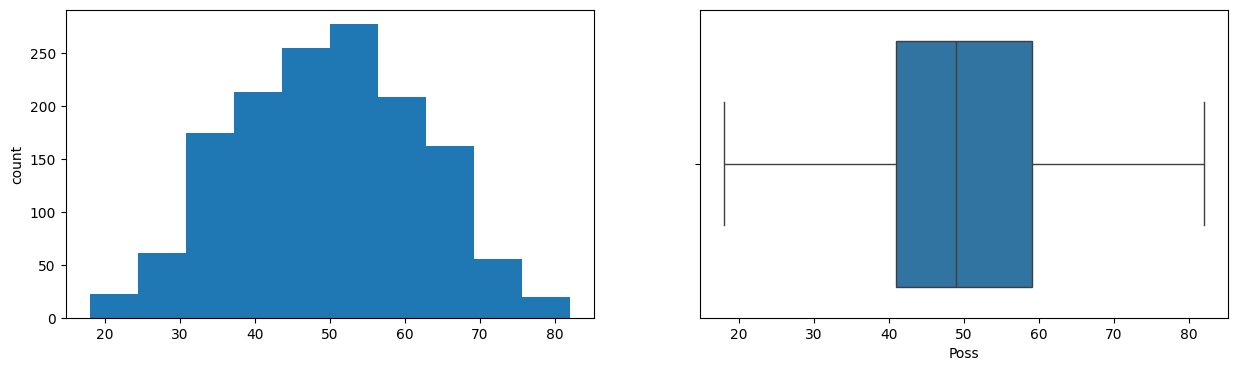

Attendance
Skew : 0.29


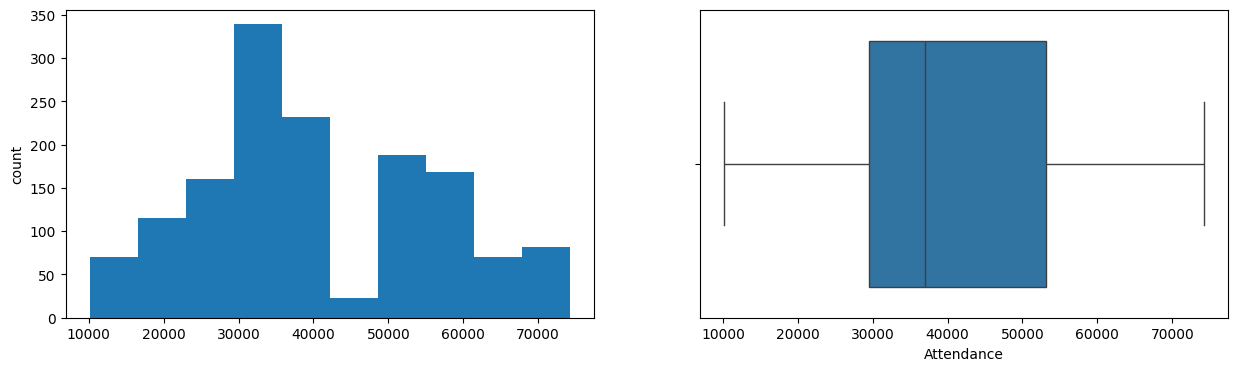

Sh
Skew : 0.64


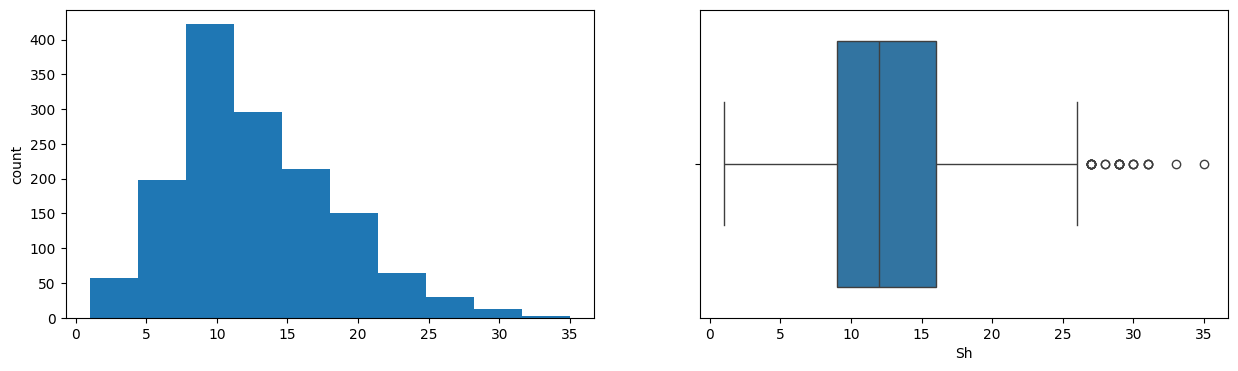

SoT
Skew : 0.83


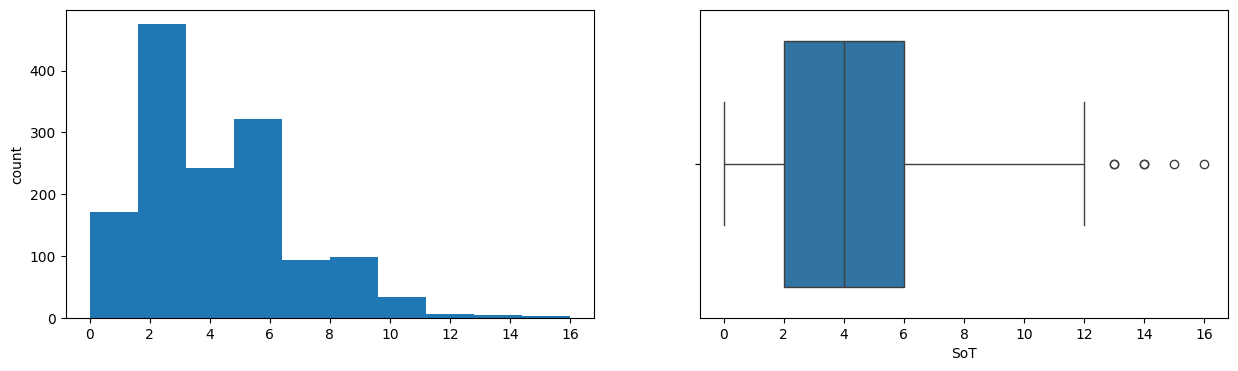

Dist
Skew : 0.35


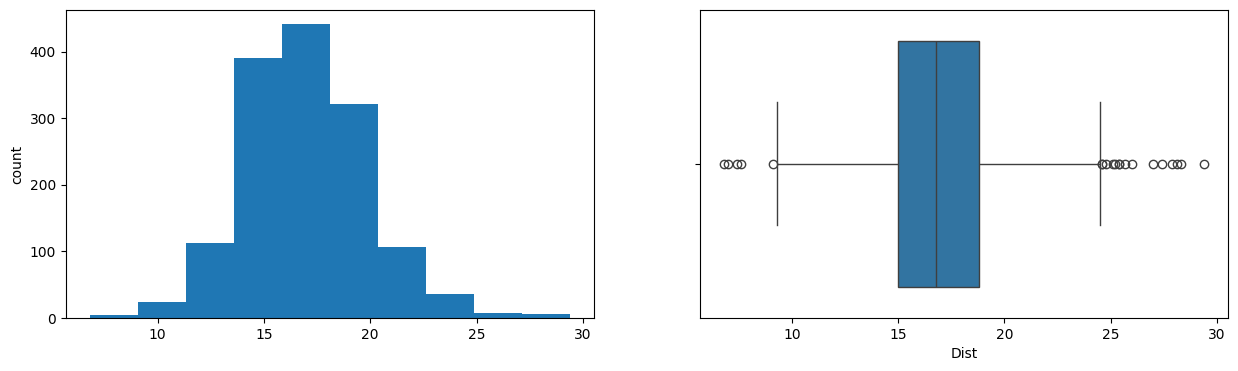

FK
Skew : 1.46


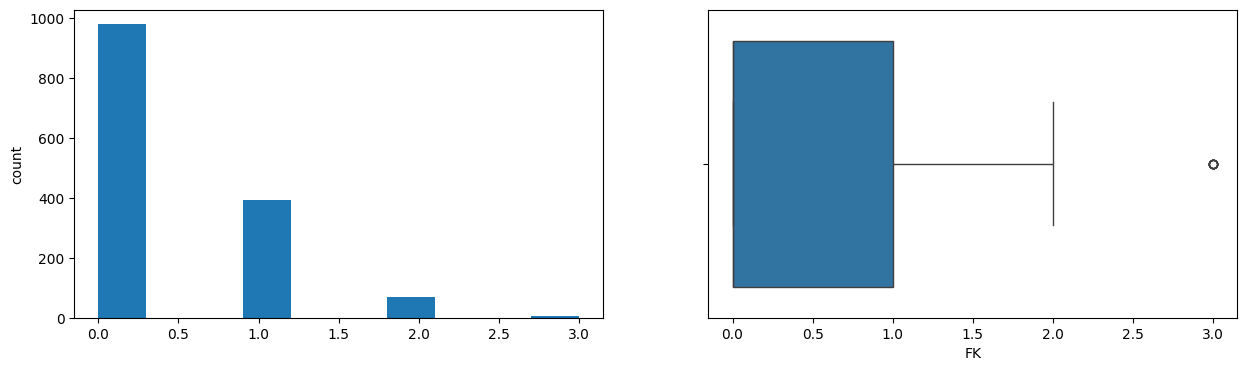

PK
Skew : 3.15


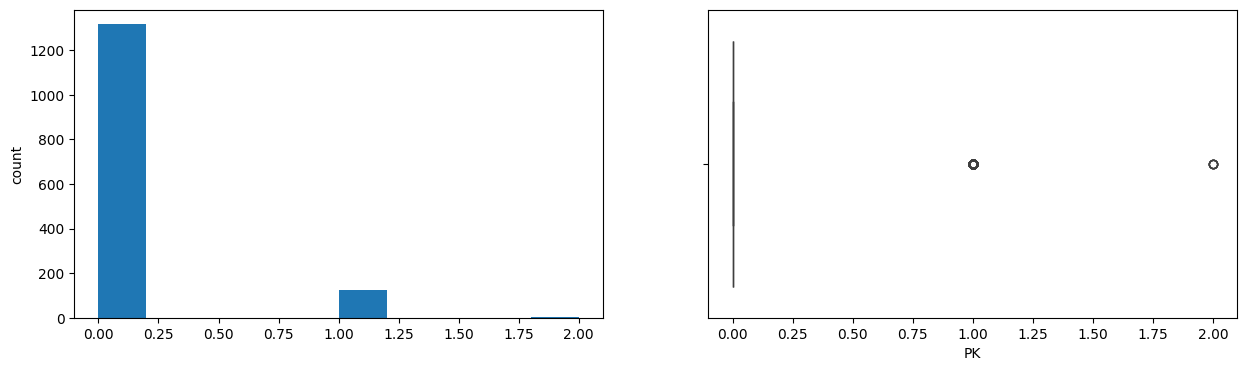

PKatt
Skew : 2.77


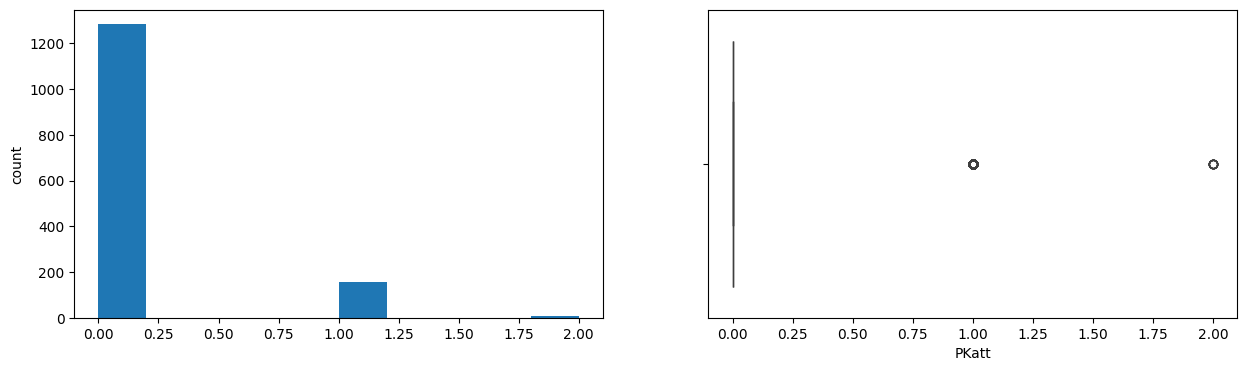

venue_code
Skew : -0.0


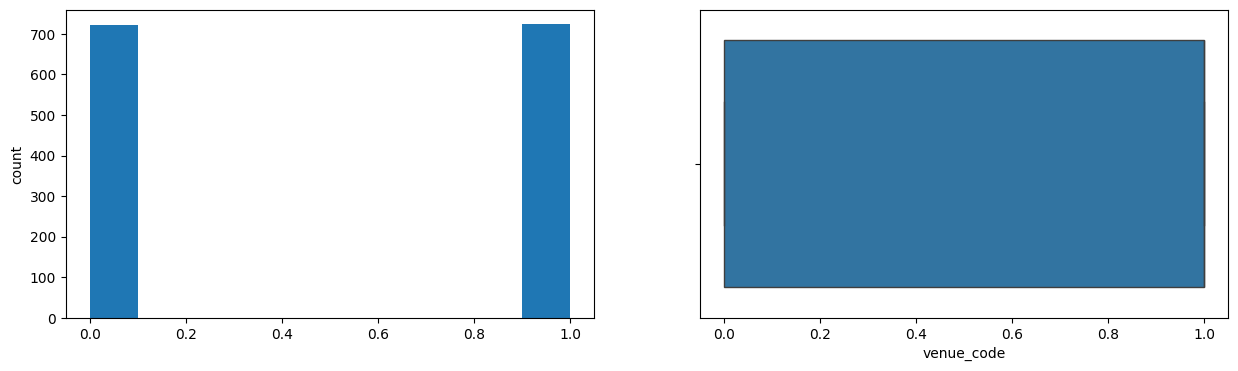

opp_code
Skew : 0.24


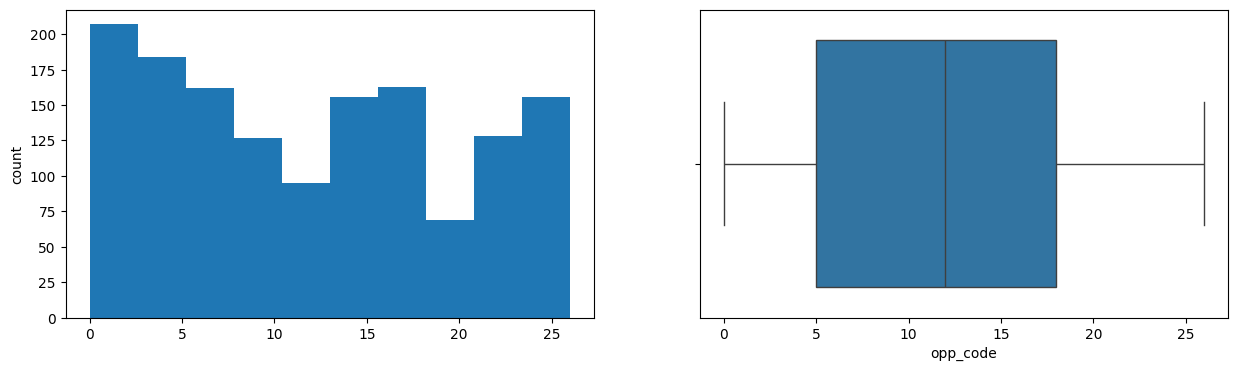

hours
Skew : 0.54


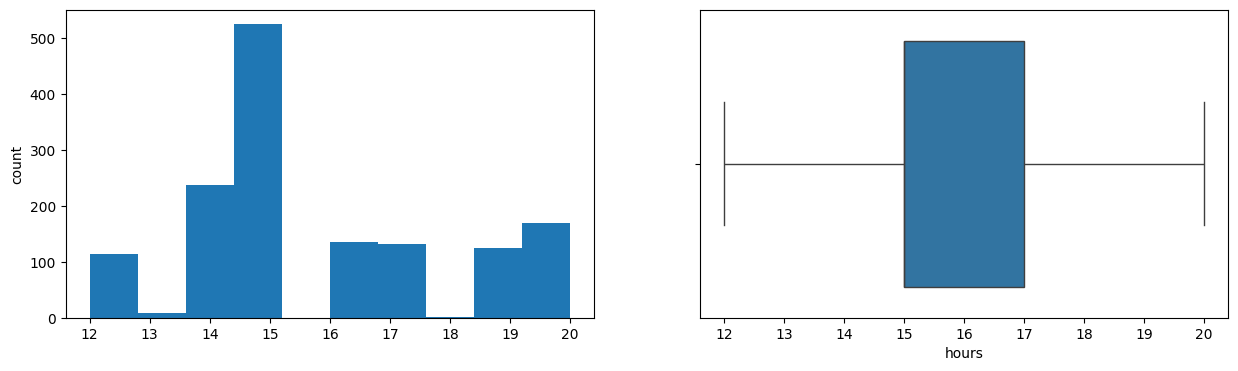

day_code
Skew : 1.19


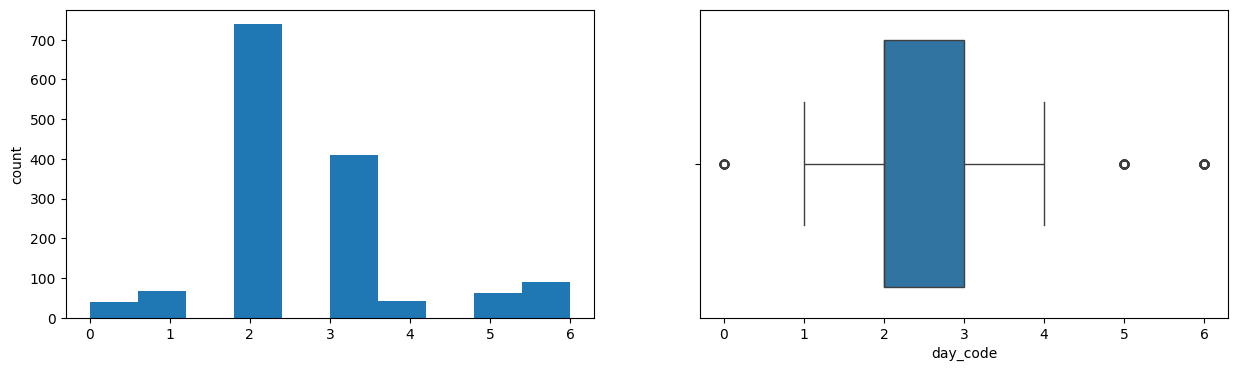

target
Skew : 0.57


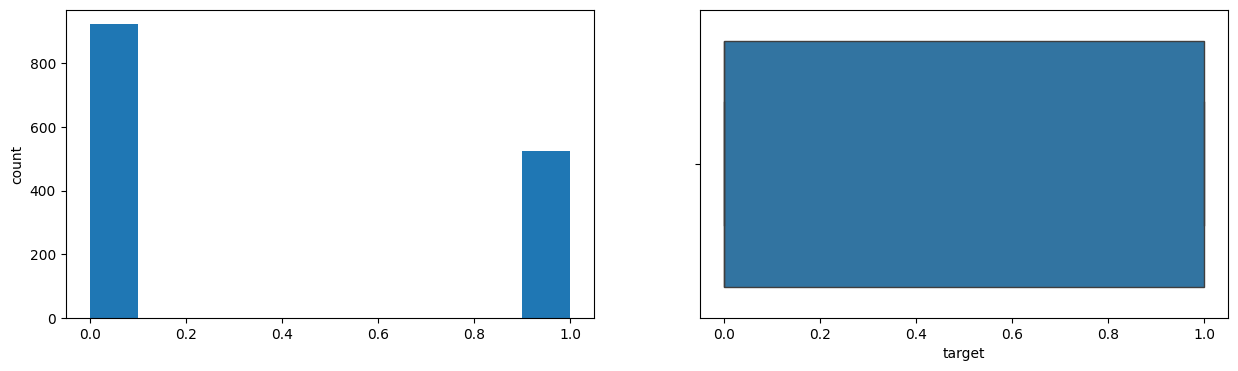

recent_form
Skew : 0.44


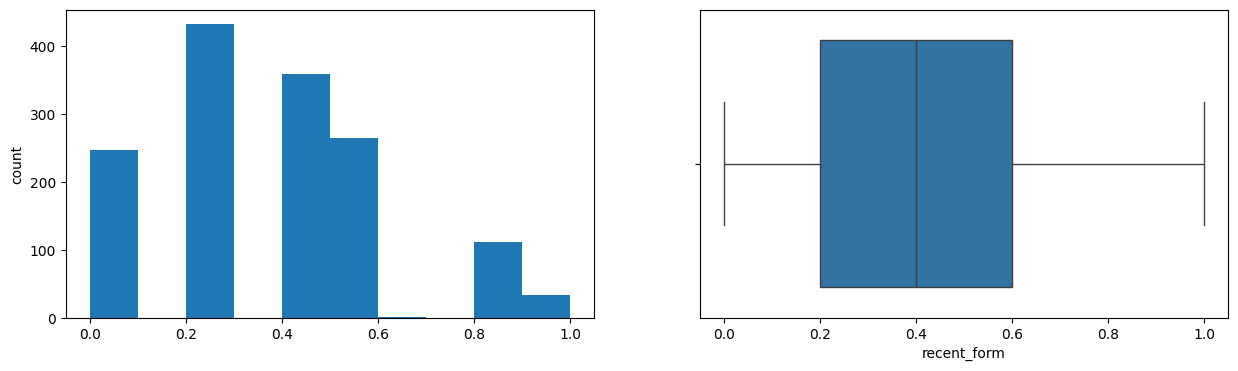

h2h_wins
Skew : 0.78


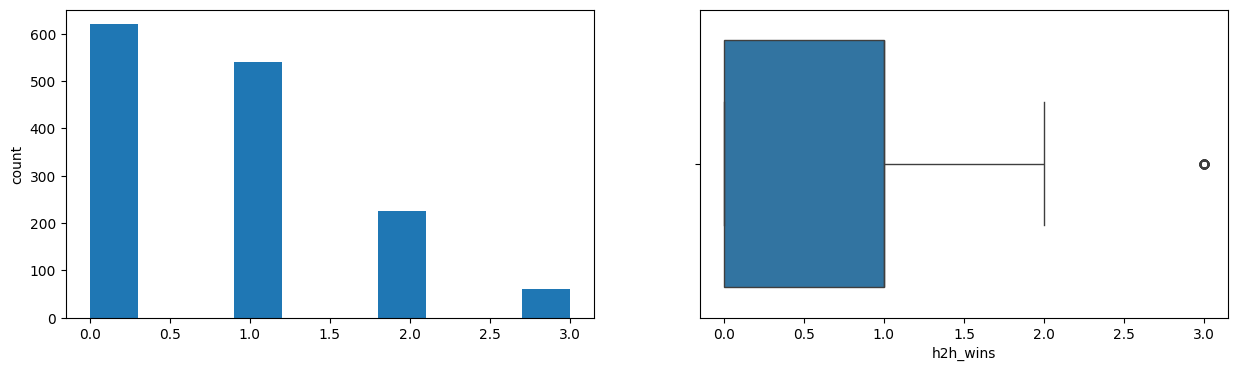

gf_rolling
Skew : 0.73


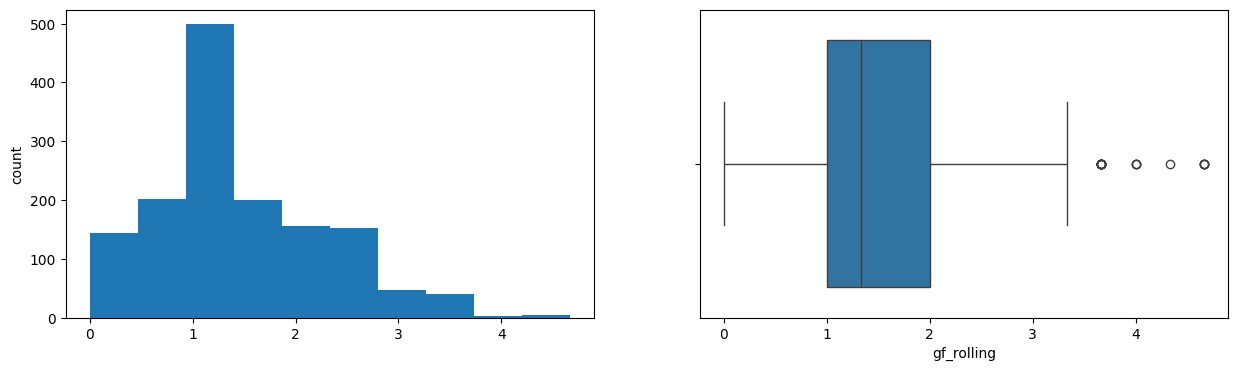

ga_rolling
Skew : 0.65


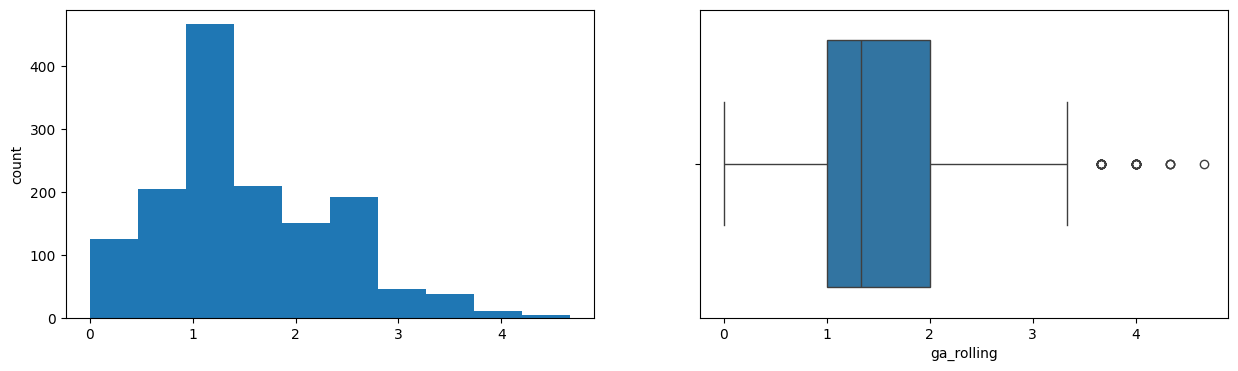

sh_rolling
Skew : 0.49


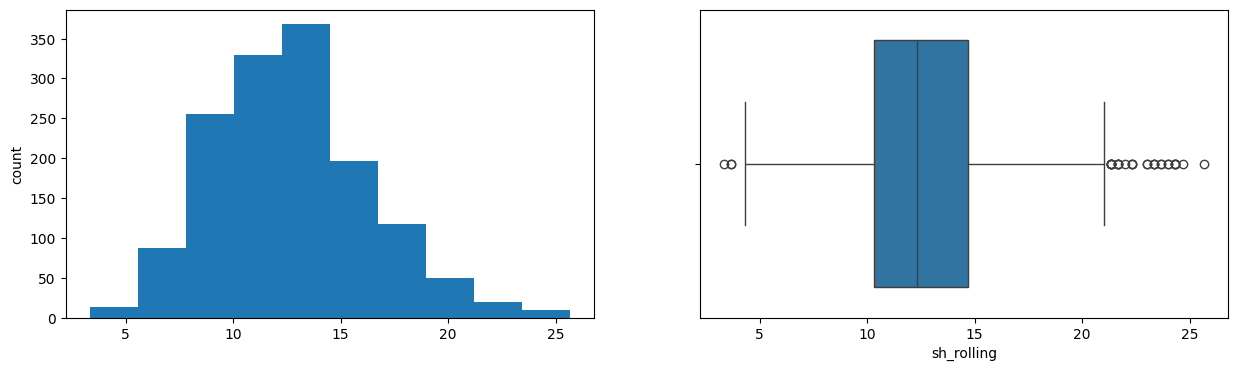

sot_rolling
Skew : 0.46


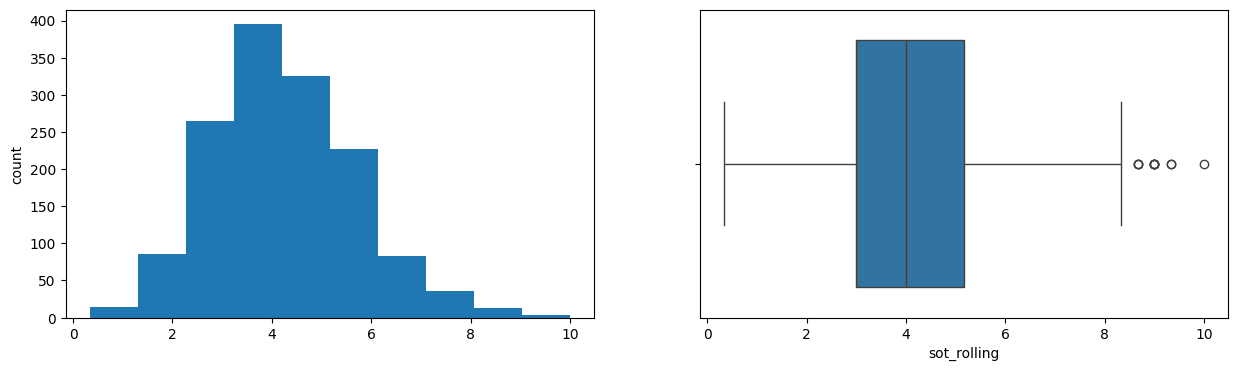

dist_rolling
Skew : 0.09


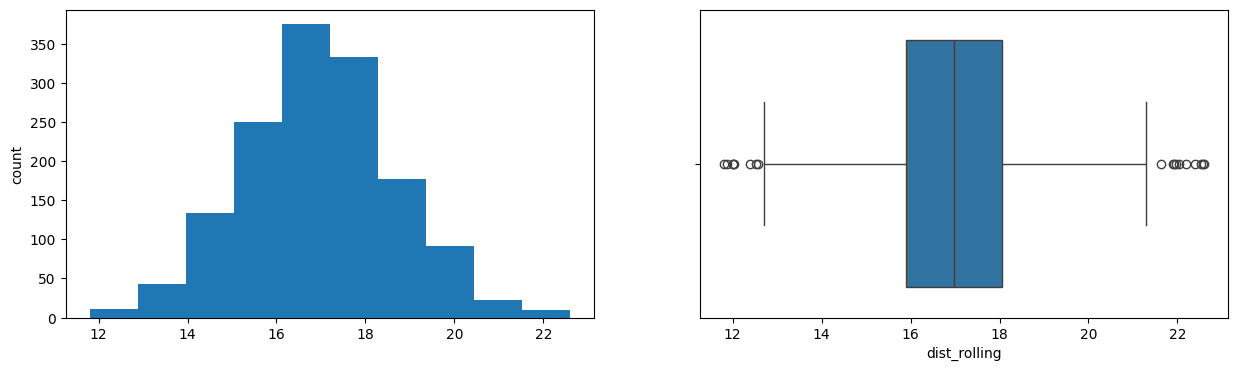

fk_rolling
Skew : 0.79


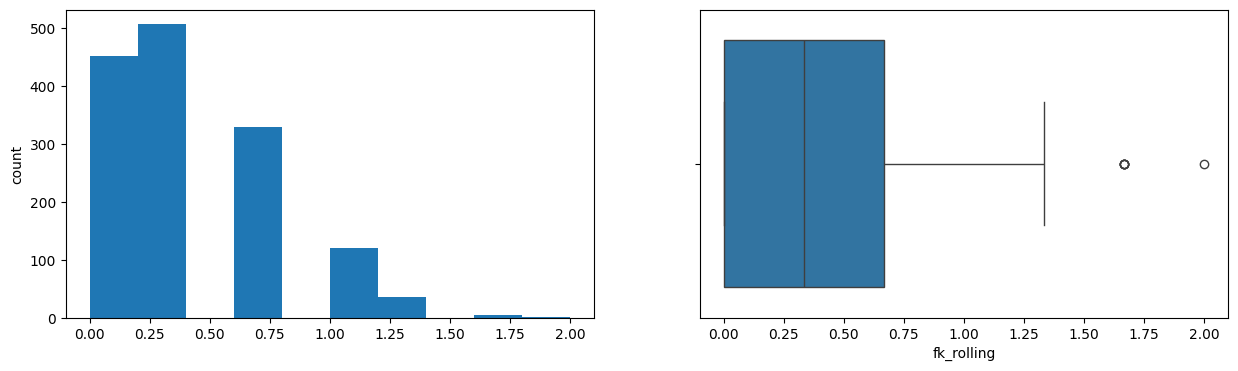

pk_rolling
Skew : 1.67


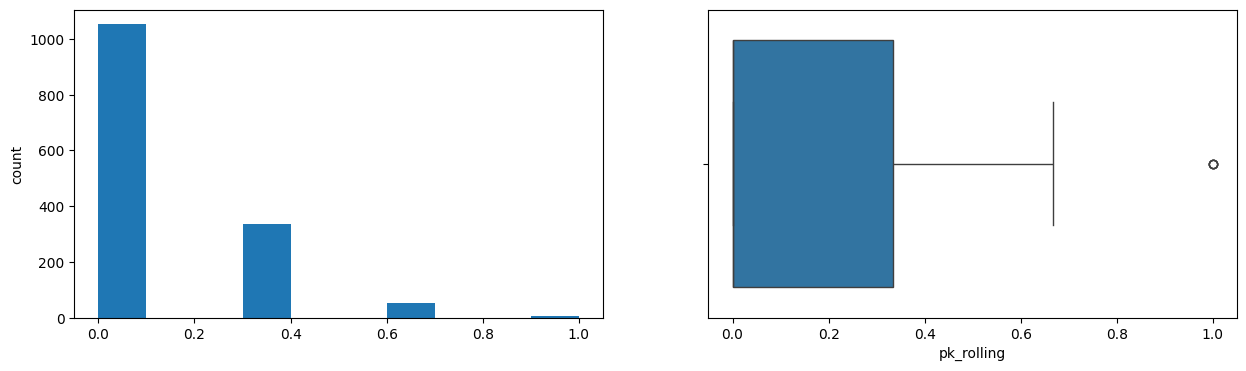

pkatt_rolling
Skew : 1.49


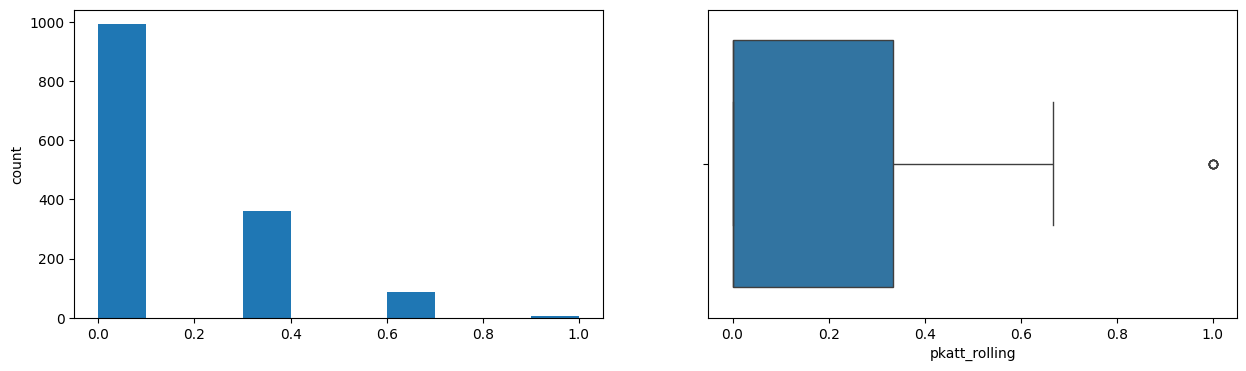

In [494]:
for col in num_cols:
    print(col)
    skew_value = matches_rolling[col].skew()
    print('Skew :', round(float(skew_value), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    matches_rolling[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=matches_rolling[col])
    plt.show()

In [495]:
# Hàm loại bỏ các giá trị ngoại lai
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tính các khoảng giới hạn
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Xóa các dòng có giá trị nằm ngoài khoảng
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

In [496]:
matches_rolling = remove_outliers(matches_rolling, 'Sh')

In [497]:
matches_rolling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 2046
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1422 non-null   object 
 1   Time           1422 non-null   object 
 2   Result         1422 non-null   object 
 3   GF             1422 non-null   float64
 4   GA             1422 non-null   float64
 5   Opponent       1422 non-null   object 
 6   xG             1422 non-null   float64
 7   xGA            1422 non-null   float64
 8   Poss           1422 non-null   float64
 9   Attendance     1422 non-null   float64
 10  Captain        1422 non-null   object 
 11  Formation      1422 non-null   object 
 12  Opp Formation  1422 non-null   object 
 13  Referee        1422 non-null   object 
 14  Sh             1422 non-null   float64
 15  SoT            1422 non-null   float64
 16  Dist           1422 non-null   float64
 17  FK             1422 non-null   float64
 18  PK           

In [498]:
matches_rolling = matches_rolling.sort_values(by='Date')


In [499]:
matches_rolling['target'].value_counts()

target
0    915
1    507
Name: count, dtype: int64

In [500]:
train,test = train_test_split(matches_rolling, test_size=0.2, random_state=42, stratify=matches_rolling['target'])

In [501]:
# Add rolling averages to your predictors
predictor_cols = [
    "venue_code", "opp_code", "hours", "day_code",
    "gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling",
    "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling","recent_form", "h2h_wins"
]


In [502]:
X_train = train[predictor_cols]
y_train = train["target"]
X_test = test[predictor_cols]
y_test = test["target"]

In [503]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [504]:
# 5. Train with better parameters to prevent overfitting
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    class_weight='balanced',
    min_samples_split=20,  # Increase minimum samples
    min_samples_leaf=10,  # Add leaf constraint
    max_features='sqrt',  # Limit features per split
    random_state=42
)

In [505]:
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [506]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148  35]
 [ 41  61]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       183
           1       0.64      0.60      0.62       102

    accuracy                           0.73       285
   macro avg       0.71      0.70      0.71       285
weighted avg       0.73      0.73      0.73       285



In [507]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.7819
Testing accuracy: 0.7333


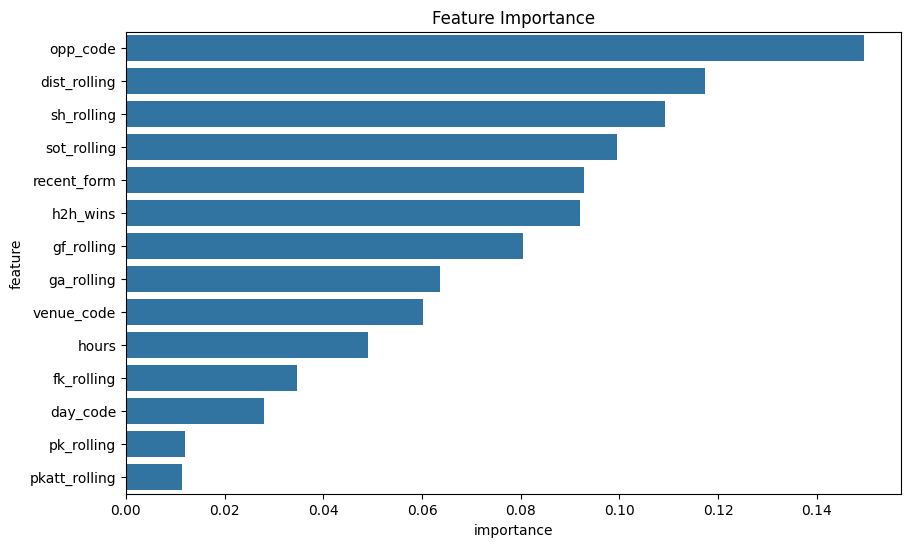

In [508]:
# Analyze which features matter most
feature_importance = pd.DataFrame({
    'feature': predictor_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [509]:
combined = pd.DataFrame(dict(actual=y_test, predicted=y_pred))

In [510]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,148,35
1,41,61


In [511]:
train_gr,test_gr = train_test_split(matches_rolling, test_size=0.2, random_state=42, stratify=matches_rolling['target'])

In [512]:
X_train = train_gr[predictor_cols]
y_train = train_gr["target"]
X_test = test_gr[predictor_cols]
y_test = test_gr["target"]

In [513]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [514]:
# 5. Train with better parameters to prevent overfitting
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    min_samples_split=20,  # Increase minimum samples
    min_samples_leaf=10,  # Add leaf constraint
    max_features='sqrt',  # Limit features per split
    random_state=42
)

In [515]:
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [516]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[172  11]
 [ 73  29]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       183
           1       0.72      0.28      0.41       102

    accuracy                           0.71       285
   macro avg       0.71      0.61      0.61       285
weighted avg       0.71      0.71      0.66       285



In [517]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.7704
Testing accuracy: 0.7053


In [518]:
combined = pd.DataFrame(dict(actual=y_test, predicted=y_pred))


In [519]:
combined = combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [520]:
combined

,actual,predicted,Date,Team,Opponent,Result
1203,1,0,2/20/2024,Manchester City,Brentford,W
569,1,1,8/27/2022,Chelsea,Leicester City,W
2035,0,0,9/16/2023,Wolverhampton Wanderers,Liverpool,L
1027,0,0,9/17/2022,Leicester City,Tottenham,L
820,0,0,5/10/2025,Fulham,Everton,L
...,...,...,...,...,...,...
623,1,0,2/2/2025,Crystal Palace,Manchester Utd,W
947,0,0,11/30/2024,Leicester City,Brentford,L
1693,0,0,8/13/2022,Southampton,Leeds United,D
734,0,0,4/22/2023,Everton,Crystal Palace,D


In [521]:
class MissingDict(dict):
    __missing__ = lambda self, key: key
map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}
mapping = MissingDict(**map_values)


In [522]:
combined['new_team'] = combined['Team'].map(mapping)

In [523]:
merged = combined.merge(combined, left_on=["Date","new_team"], right_on=["Date","Opponent"])

In [524]:
merged

,actual_x,predicted_x,Date,Team_x,Opponent_x,Result_x,new_team_x,actual_y,predicted_y,Team_y,Opponent_y,Result_y,new_team_y
0,0,0,5/10/2025,Fulham,Everton,L,Fulham,1,0,Everton,Fulham,W,Everton
1,0,1,9/27/2025,Tottenham Hotspur,Wolves,D,Tottenham,0,0,Wolverhampton Wanderers,Tottenham,D,Wolves
2,0,0,4/3/2023,Everton,Tottenham,D,Everton,0,0,Tottenham Hotspur,Everton,D,Tottenham
3,0,0,4/8/2023,Brighton and Hove Albion,Tottenham,L,Brighton,1,0,Tottenham Hotspur,Brighton,W,Tottenham
4,0,0,8/7/2022,Leicester City,Brentford,D,Leicester City,0,0,Brentford,Leicester City,D,Brentford
5,0,0,5/15/2022,Everton,Brentford,L,Everton,1,0,Brentford,Everton,W,Brentford
6,1,1,8/28/2022,Tottenham Hotspur,Nott'ham Forest,W,Tottenham,0,1,Nottingham Forest,Tottenham,L,Nottingham Forest
7,1,0,3/13/2022,West Ham United,Aston Villa,W,West Ham,0,0,Aston Villa,West Ham,L,Aston Villa
8,1,0,5/15/2022,Brentford,Everton,W,Brentford,0,0,Everton,Brentford,L,Everton
9,1,0,4/8/2023,Tottenham Hotspur,Brighton,W,Tottenham,0,0,Brighton and Hove Albion,Tottenham,L,Brighton


In [525]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

actual_x
0    2
1    2
Name: count, dtype: int64

In [526]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [527]:
y_pred = xgb_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[151  32]
 [ 66  36]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       183
           1       0.53      0.35      0.42       102

    accuracy                           0.66       285
   macro avg       0.61      0.59      0.59       285
weighted avg       0.64      0.66      0.64       285



In [528]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.7704
Testing accuracy: 0.7053


In [529]:
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 405, number of negative: 732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 1137, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356201 -> initscore=-0.591893
[LightGBM] [Info] Start training from score -0.591893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [530]:
y_pred = lgbm_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[147  36]
 [ 57  45]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       183
           1       0.56      0.44      0.49       102

    accuracy                           0.67       285
   macro avg       0.64      0.62      0.63       285
weighted avg       0.66      0.67      0.66       285



In [531]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.7704
Testing accuracy: 0.7053


In [532]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[166  17]
 [ 64  38]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       183
           1       0.69      0.37      0.48       102

    accuracy                           0.72       285
   macro avg       0.71      0.64      0.64       285
weighted avg       0.71      0.72      0.69       285



In [533]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"\nTraining accuracy: {train_score:.4f}")
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.7704
Testing accuracy: 0.7053


In [534]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('lr', lr_model)
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 405, number of negative: 732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 1137, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356201 -> initscore=-0.591893
[LightGBM] [Info] Start training from score -0.591893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10


In [535]:
y_pred = voting_clf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[162  21]
 [ 69  33]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       183
           1       0.61      0.32      0.42       102

    accuracy                           0.68       285
   macro avg       0.66      0.60      0.60       285
weighted avg       0.67      0.68      0.65       285



In [541]:
def predict_match_winner(team, opponent, venue='Home', hour=15, day='Sat', model_to_use='voting'):
    """
    Predict the winner of a football match
    
    Parameters:
    -----------
    team : str
        Home team name (must match team names in dataset)
    opponent : str
        Away team name (must match team names in dataset)
    venue : str
        'Home' or 'Away'
    hour : int
        Match hour (0-23)
    day : str
        Day of week ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
    model_to_use : str
        Which model to use: 'voting', 'rf', 'xgb', 'lgbm', 'lr'
    
    Returns:
    --------
    dict : Prediction results with probabilities
    """
    
    # Select model
    models = {
        'voting': voting_clf,
        'rf': model,
        'xgb': xgb_model,
        'lgbm': lgbm_model,
        'lr': lr_model
    }
    
    selected_model = models.get(model_to_use, voting_clf)
    
    # Get venue code
    venue_code = 1 if venue == 'Home' else 0
    
    # Get opponent code from training data
    try:
        # Find opponent code from the original encoded data
        opp_code_match = match_df[match_df['Opponent'] == opponent]['opp_code'].iloc[0]
    except:
        print(f"Warning: Opponent '{opponent}' not found in training data. Using code 0.")
        opp_code_match = 0
    
    # Get day code
    day_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
    day_code = day_mapping.get(day, 5)
    
    # Get recent stats for the team
    team_recent = matches_rolling[matches_rolling['Team'] == team].sort_values('Date').tail(1)
    
    if len(team_recent) == 0:
        print(f"Error: No data found for team '{team}'")
        print("\nAvailable teams:")
        print(sorted(matches_rolling['Team'].unique()))
        return None
    
    # Extract features in the correct order
    try:
        sample = np.array([[
            venue_code,                                  # venue_code
            opp_code_match,                              # opp_code
            hour,                                        # hours
            day_code,                                    # day_code
            team_recent['gf_rolling'].values[0],         # gf_rolling
            team_recent['ga_rolling'].values[0],         # ga_rolling
            team_recent['sh_rolling'].values[0],         # sh_rolling
            team_recent['sot_rolling'].values[0],        # sot_rolling
            team_recent['dist_rolling'].values[0],       # dist_rolling
            team_recent['fk_rolling'].values[0],         # fk_rolling
            team_recent['pk_rolling'].values[0],         # pk_rolling
            team_recent['pkatt_rolling'].values[0],      # pkatt_rolling
            team_recent['recent_form'].values[0],        # recent_form
            team_recent['h2h_wins'].values[0]            # h2h_wins
        ]])
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None
    
    # Scale the features
    sample_scaled = scaler.transform(sample)
    
    # Make prediction
    prediction = selected_model.predict(sample_scaled)[0]
    probability = selected_model.predict_proba(sample_scaled)[0]
    
    # Prepare results
    result = {
        'team': team,
        'opponent': opponent,
        'venue': venue,
        'prediction': 'WIN' if prediction == 1 else 'NOT WIN (Draw/Loss)',
        'win_probability': probability[1],
        'not_win_probability': probability[0],
        'model_used': model_to_use,
        'team_recent_form': team_recent['recent_form'].values[0] if not pd.isna(team_recent['recent_form'].values[0]) else 0,
        'h2h_record': team_recent['h2h_wins'].values[0] if not pd.isna(team_recent['h2h_wins'].values[0]) else 0
    }
    
    # Print formatted output
    print(f"\n{'='*60}")
    print(f"MATCH PREDICTION: {team} vs {opponent}")
    print(f"{'='*60}")
    print(f"Venue: {venue}")
    print(f"Match Time: {day} at {hour}:00")
    print(f"Model Used: {model_to_use.upper()}")
    print(f"-" * 60)
    print(f"Prediction: {team} will {result['prediction']}")
    print(f"Win Probability: {probability[1]:.2%}")
    print(f"Not Win Probability: {probability[0]:.2%}")
    print(f"-" * 60)
    print(f"Team Recent Form (last 5): {result['team_recent_form']:.2f}")
    print(f"Head-to-Head Wins (last 3): {result['h2h_record']:.0f}")
    print(f"{'='*60}\n")
    
    return result

# Function to compare predictions from all models
def compare_all_models(team, opponent, venue='Home', hour=15, day='Sat'):
    """
    Compare predictions from all available models
    """
    print(f"\n{'='*60}")
    print(f"COMPARING ALL MODELS: {team} vs {opponent}")
    print(f"{'='*60}\n")
    
    models_list = ['voting', 'rf', 'xgb', 'lgbm', 'lr']
    model_names = {
        'voting': 'Voting Ensemble',
        'rf': 'Random Forest',
        'xgb': 'XGBoost',
        'lgbm': 'LightGBM',
        'lr': 'Logistic Regression'
    }
    
    results = []
    
    for model_type in models_list:
        result = predict_match_winner(team, opponent, venue, hour, day, model_type)
        if result:
            results.append({
                'Model': model_names[model_type],
                'Prediction': result['prediction'],
                'Win Prob': f"{result['win_probability']:.2%}"
            })
    
    # Display comparison table
    comparison_df = pd.DataFrame(results)
    print("\n" + "="*60)
    print("MODEL COMPARISON SUMMARY")
    print("="*60)
    print(comparison_df.to_string(index=False))
    print("="*60 + "\n")
    
    return comparison_df

# Example usage
predict_match_winner('Liverpool', 'Manchester Utd', venue='Home', hour=16, day='Sun', model_to_use='voting')

# Compare all models
compare_all_models('Liverpool', 'Manchester Utd', venue='Home', hour=16, day='Sun')

# Predict Liverpool at home vs Manchester Utd
predict_match_winner('Liverpool', 'Manchester Utd', venue='Home', hour=16, day='Sun', model_to_use='voting')


MATCH PREDICTION: Liverpool vs Manchester Utd
Venue: Home
Match Time: Sun at 16:00
Model Used: VOTING
------------------------------------------------------------
Prediction: Liverpool will WIN
Win Probability: 68.59%
Not Win Probability: 31.41%
------------------------------------------------------------
Team Recent Form (last 5): 0.40
Head-to-Head Wins (last 3): 2


COMPARING ALL MODELS: Liverpool vs Manchester Utd


MATCH PREDICTION: Liverpool vs Manchester Utd
Venue: Home
Match Time: Sun at 16:00
Model Used: VOTING
------------------------------------------------------------
Prediction: Liverpool will WIN
Win Probability: 68.59%
Not Win Probability: 31.41%
------------------------------------------------------------
Team Recent Form (last 5): 0.40
Head-to-Head Wins (last 3): 2


MATCH PREDICTION: Liverpool vs Manchester Utd
Venue: Home
Match Time: Sun at 16:00
Model Used: RF
------------------------------------------------------------
Prediction: Liverpool will WIN
Win Probability

{'team': 'Liverpool',
 'opponent': 'Manchester Utd',
 'venue': 'Home',
 'prediction': 'WIN',
 'win_probability': np.float64(0.6859010229231506),
 'not_win_probability': np.float64(0.3140989770768494),
 'model_used': 'voting',
 'team_recent_form': np.float64(0.4),
 'h2h_record': np.float64(2.0)}

In [542]:
# Single prediction with voting classifier
predict_match_winner('Manchester City', 'Arsenal', venue='Home', hour=15, day='Sat')

# Use specific model
predict_match_winner('Chelsea', 'Tottenham', venue='Away', hour=12, day='Sun', model_to_use='xgb')

# Compare all models for a match
compare_all_models('Liverpool', 'Manchester City', venue='Home', hour=17, day='Sat')


MATCH PREDICTION: Manchester City vs Arsenal
Venue: Home
Match Time: Sat at 15:00
Model Used: VOTING
------------------------------------------------------------
Prediction: Manchester City will WIN
Win Probability: 54.01%
Not Win Probability: 45.99%
------------------------------------------------------------
Team Recent Form (last 5): 0.60
Head-to-Head Wins (last 3): 3


MATCH PREDICTION: Chelsea vs Tottenham
Venue: Away
Match Time: Sun at 12:00
Model Used: XGB
------------------------------------------------------------
Prediction: Chelsea will NOT WIN (Draw/Loss)
Win Probability: 38.54%
Not Win Probability: 61.46%
------------------------------------------------------------
Team Recent Form (last 5): 0.40
Head-to-Head Wins (last 3): 2


COMPARING ALL MODELS: Liverpool vs Manchester City


MATCH PREDICTION: Liverpool vs Manchester City
Venue: Home
Match Time: Sat at 17:00
Model Used: VOTING
------------------------------------------------------------
Prediction: Liverpool will WIN


,Model,Prediction,Win Prob
0,Voting Ensemble,WIN,66.11%
1,Random Forest,WIN,59.89%
2,XGBoost,WIN,67.07%
3,LightGBM,WIN,71.00%
4,Logistic Regression,WIN,66.48%
